accuracy: 0.9180


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32451 (\N{CJK UNIFIED IDEOGRAPH-7EC3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25454 (\N{CJK UNIFIED IDEOGRAPH-636E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


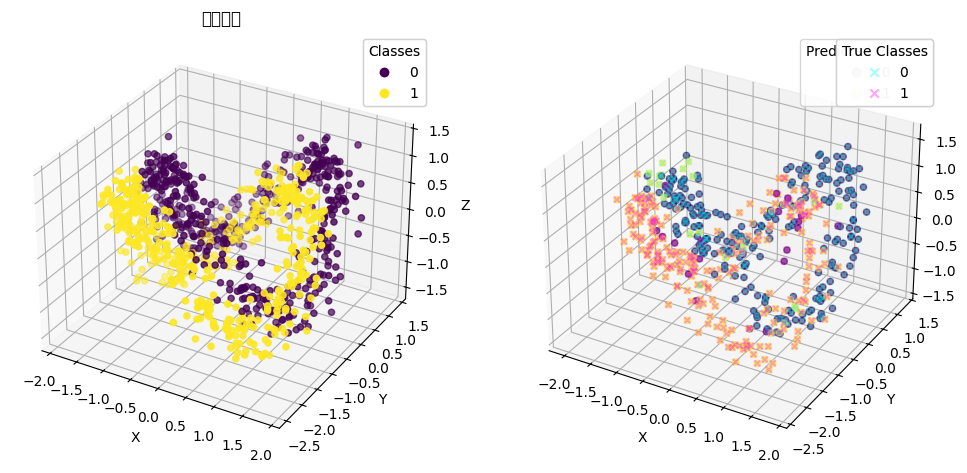

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def make_moons_3d(n_samples=500, noise=0.1):
    t = np.linspace(0, 2 * np.pi, n_samples)
    x = 1.5 * np.cos(t)
    y = np.sin(t)
    z = np.sin(2 * t)
    X = np.vstack([np.column_stack([x, y, z]), np.column_stack([-x, y - 1, -z])])
    y = np.hstack([np.zeros(n_samples), np.ones(n_samples)])
    X += np.random.normal(scale=noise, size=X.shape)
    return X, y

X_train, y_train = make_moons_3d(n_samples=500, noise=0.2)
X_test, y_test = make_moons_3d(n_samples=250, noise=0.2)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"accuracy: {accuracy_dt:.4f}")

fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=y_train, cmap='viridis', marker='o')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
legend1 = ax1.legend(*scatter1.legend_elements(), title="Classes")
ax1.add_artist(legend1)

ax2 = fig.add_subplot(122, projection='3d')
scatter2 = ax2.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=y_pred_dt, cmap='viridis', marker='o', alpha=0.6)
scatter2_true = ax2.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=y_test, cmap='cool', marker='x', alpha=0.3)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
legend2 = ax2.legend(*scatter2.legend_elements(), title="Predicted Classes")
ax2.add_artist(legend2)
legend3 = ax2.legend(*scatter2_true.legend_elements(), title="True Classes", loc='upper right')
ax2.add_artist(legend3)

plt.show()

accuracy: 0.9740


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32451 (\N{CJK UNIFIED IDEOGRAPH-7EC3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25454 (\N{CJK UNIFIED IDEOGRAPH-636E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


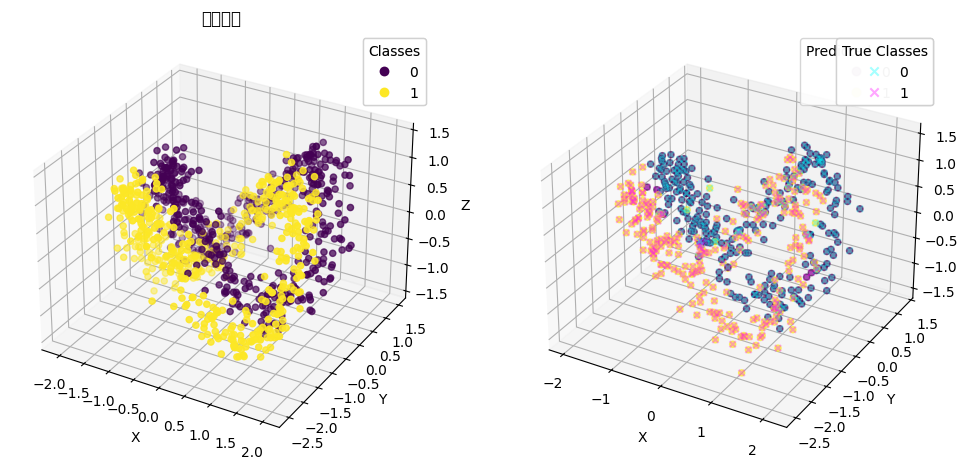

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def make_moons_3d(n_samples=500, noise=0.1):
    t = np.linspace(0, 2 * np.pi, n_samples)
    x = 1.5 * np.cos(t)
    y = np.sin(t)
    z = np.sin(2 * t)
    X = np.vstack([np.column_stack([x, y, z]), np.column_stack([-x, y - 1, -z])])
    y = np.hstack([np.zeros(n_samples), np.ones(n_samples)])
    X += np.random.normal(scale=noise, size=X.shape)
    return X, y

X_train, y_train = make_moons_3d(n_samples=500, noise=0.2)
X_test, y_test = make_moons_3d(n_samples=250, noise=0.2)

base_estimator = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
ada = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=200,
    learning_rate=0.5,
    random_state=42
)
ada.fit(X_train, y_train)

y_pred_ada = ada.predict(X_test)
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f"accuracy: {accuracy_ada:.4f}")

fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=y_train, cmap='viridis', marker='o')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
legend1 = ax1.legend(*scatter1.legend_elements(), title="Classes")
ax1.add_artist(legend1)

ax2 = fig.add_subplot(122, projection='3d')
scatter2 = ax2.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=y_pred_ada, cmap='viridis', marker='o', alpha=0.6)
scatter2_true = ax2.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=y_test, cmap='cool', marker='x', alpha=0.3)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
legend2 = ax2.legend(*scatter2.legend_elements(), title="Predicted Classes")
ax2.add_artist(legend2)
legend3 = ax2.legend(*scatter2_true.legend_elements(), title="True Classes", loc='upper right')
ax2.add_artist(legend3)
plt.show()

SVM (linearkernel) accuracy: 0.6700
SVM (polykernel) accuracy: 0.7580
SVM (rbfkernel) accuracy: 0.9860


<ipython-input-6-1b7f6e810b3c>:70: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-1b7f6e810b3c>:70: UserWarning: Glyph 32451 (\N{CJK UNIFIED IDEOGRAPH-7EC3}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-1b7f6e810b3c>:70: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-1b7f6e810b3c>:70: UserWarning: Glyph 25454 (\N{CJK UNIFIED IDEOGRAPH-636E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32451 (\N{CJK UNIFIED IDEOGRAPH-7EC3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **

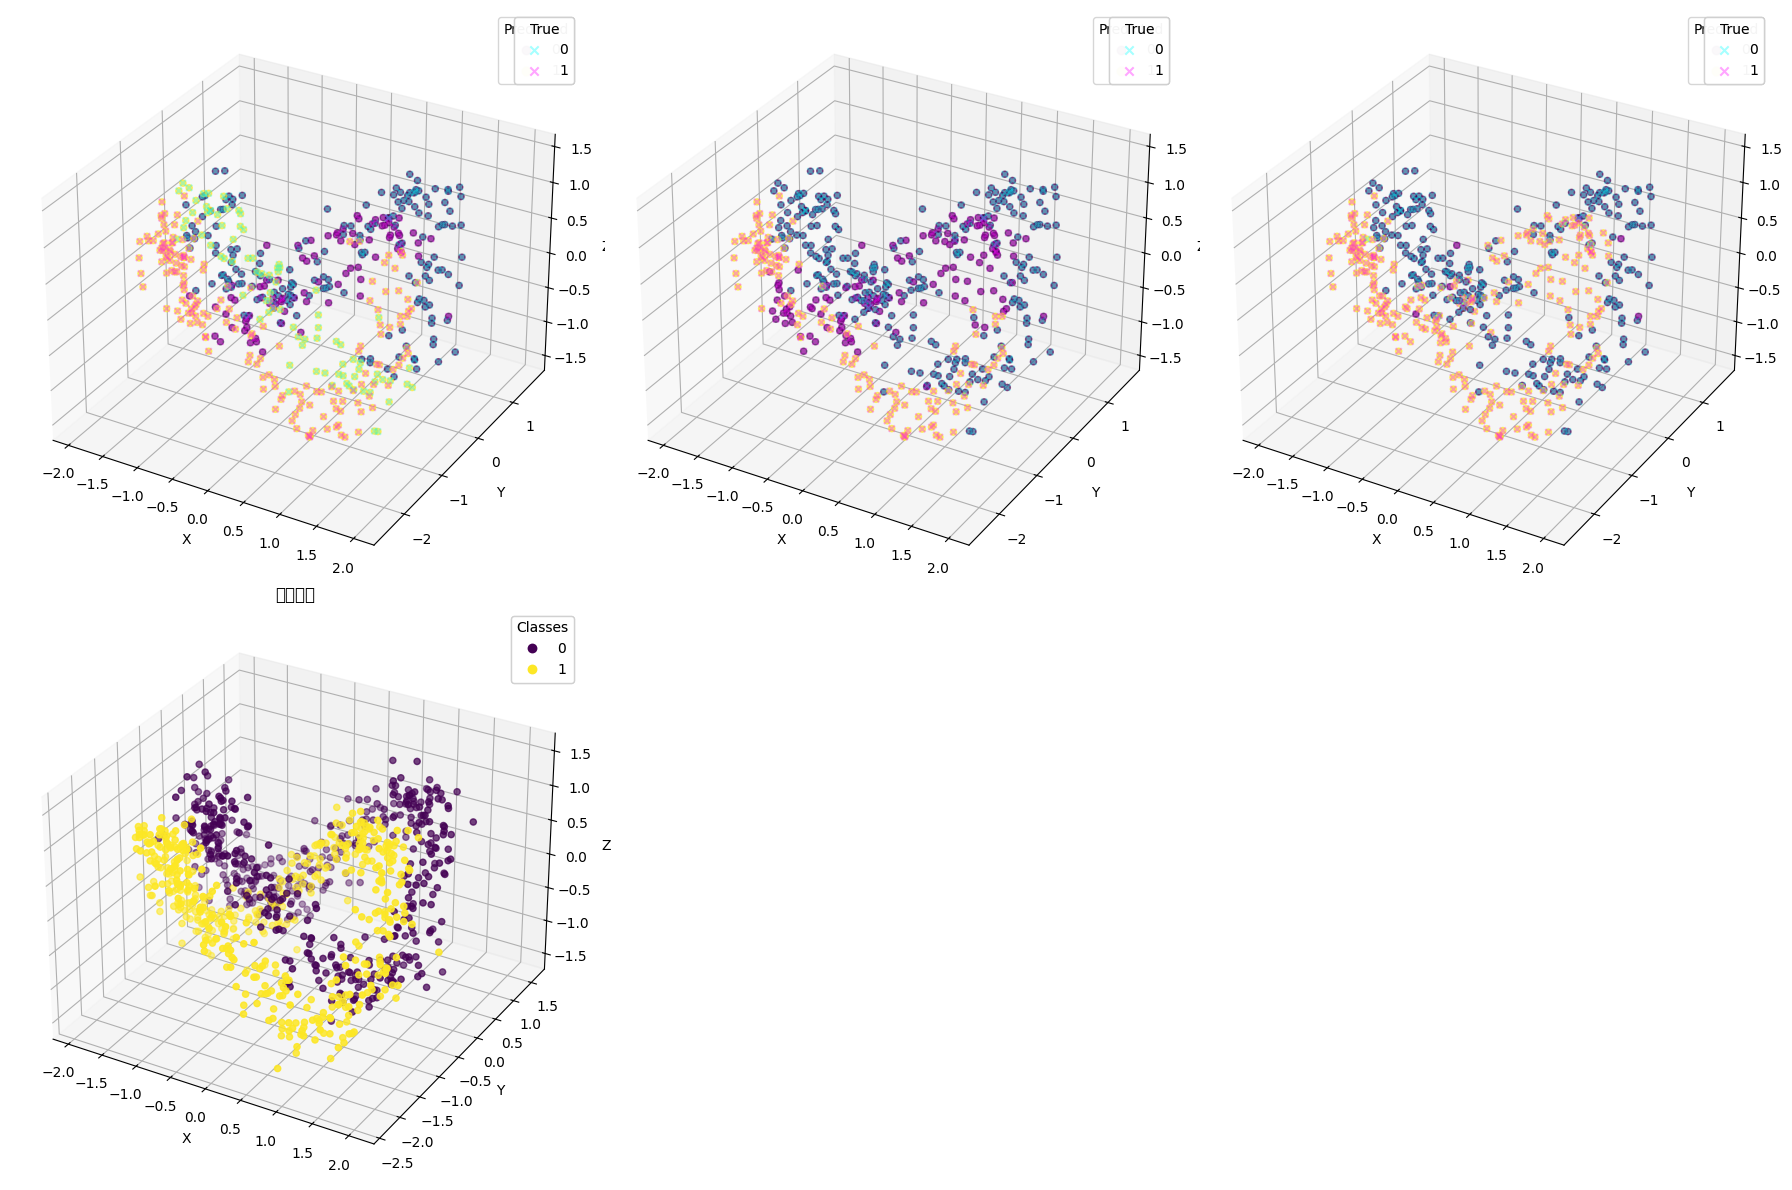


所有核函数的测试集准确率:
linear: 0.6700
poly: 0.7580
rbf: 0.9860


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

def make_moons_3d(n_samples=500, noise=0.1):
    t = np.linspace(0, 2 * np.pi, n_samples)
    x = 1.5 * np.cos(t)
    y = np.sin(t)
    z = np.sin(2 * t)
    X = np.vstack([np.column_stack([x, y, z]), np.column_stack([-x, y - 1, -z])])
    y = np.hstack([np.zeros(n_samples), np.ones(n_samples)])
    X += np.random.normal(scale=noise, size=X.shape)
    return X, y

X_train, y_train = make_moons_3d(n_samples=500, noise=0.2)
X_test, y_test = make_moons_3d(n_samples=250, noise=0.2)

kernels = ['linear', 'poly', 'rbf']
param_grids = {
    'linear': {'C': [0.1, 1, 10, 100]},
    'poly': {'C': [0.1, 1, 10], 'degree': [2, 3, 4], 'gamma': [0.01, 0.1, 1]},
    'rbf': {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 'scale']}
}

best_models = {}
accuracies = {}
predictions = {}

fig = plt.figure(figsize=(18, 12))

ax_train = fig.add_subplot(2, 3, 4, projection='3d')
scatter_train = ax_train.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=y_train, cmap='viridis', marker='o')
ax_train.set_xlabel('X')
ax_train.set_ylabel('Y')
ax_train.set_zlabel('Z')
legend_train = ax_train.legend(*scatter_train.legend_elements(), title="Classes")
ax_train.add_artist(legend_train)

for i, kernel in enumerate(kernels):

    svm = SVC(kernel=kernel, random_state=42)

    grid_search = GridSearchCV(svm, param_grids[kernel], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_models[kernel] = best_model

    y_pred = best_model.predict(X_test)
    predictions[kernel] = y_pred

    accuracy = accuracy_score(y_test, y_pred)
    accuracies[kernel] = accuracy
    print(f"SVM ({kernel}kernel) accuracy: {accuracy:.4f}")
    ax = fig.add_subplot(2, 3, 1 + i, projection='3d')
    scatter = ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=y_pred, cmap='viridis', marker='o', alpha=0.6)
    scatter_true = ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=y_test, cmap='cool', marker='x', alpha=0.3)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    legend1 = ax.legend(*scatter.legend_elements(), title="Predicted")
    ax.add_artist(legend1)
    legend2 = ax.legend(*scatter_true.legend_elements(), title="True", loc='upper right')
    ax.add_artist(legend2)

plt.tight_layout()
plt.show()

for kernel, acc in accuracies.items():
    print(f"{kernel}: {acc:.4f}")